**<font size="6" color="red">ch12. 데이터프레임과 시리즈(Pandas)</font>**

# 8절. 데이터 그룹화 및 집계

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
iris_df = sm.datasets.get_rdataset('iris',package='datasets').data
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 8.1 Group by

In [2]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped['Sepal.Length','Sepal.Width'].mean()

<ipython-input-2-fc84425ddbd8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  iris_grouped['Sepal.Length','Sepal.Width'].mean()


,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [3]:
# pivot_table 기본값은 mean 
# 연산은 agfunc에 기입
iris_df.pivot_table(index='Species',values=['Sepal.Length','Sepal.Width'],aggfunc='sum')

,Sepal.Length,Sepal.Width
Species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


In [4]:
iris_grouped = iris_df.groupby(iris_df.Species)

In [5]:
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [6]:
iris_df.loc[1,'Sepal.Length'] = np.nan

In [7]:
import random
rownum = random.sample(range(len(iris_df)),4)
rownum

[28, 61, 99, 93]

In [8]:
for row in rownum:
    iris_df.loc[row,'Sepal.Length'] = np.nan

In [9]:
iris_df.loc[rownum,'Sepal.Length']

28   NaN
61   NaN
99   NaN
93   NaN
Name: Sepal.Length, dtype: float64

In [10]:
iris_grouped = iris_df.groupby(iris_df.Species)
iris_grouped.count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,48,50,50,50
versicolor,47,50,50,50
virginica,50,50,50,50


**다중 열로 그룹화**

In [11]:
iris_df.groupby([iris_df.Species,iris_df['Sepal.Length']]).mean()

Sepal.Width  Petal.Length  Petal.Width
Species    Sepal.Length                                        
setosa     4.3              3.000000      1.100000     0.100000
           4.4              3.033333      1.333333     0.200000
           4.5              2.300000      1.300000     0.300000
           4.6              3.325000      1.325000     0.225000
           4.7              3.200000      1.450000     0.200000
           4.8              3.180000      1.580000     0.200000
           4.9              3.266667      1.466667     0.133333
           5.0              3.362500      1.450000     0.287500
           5.1              3.600000      1.562500     0.312500
           5.2              3.800000      1.500000     0.150000
           5.3              3.700000      1.500000     0.200000
           5.4              3.660000      1.540000     0.320000
           5.5              3.850000      1.350000     0.200000
           5.7              4.100000      1.600000     0.350000
           5.8              4.000000      1.200000     0.200000
versicolor 4.9              2.400000      3.300000     1.000000
           5.0              2.000000      3.500000     1.000000
           5.1              2.500000      3.000000     1.100000
           5.2              2.700000      3.900000     1.400000
           5.4              3.000000      4.500000     1.500000
           5.5              2.440000      3.980000     1.180000
           5.6              2.820000      4.060000     1.300000
           5.7              2.825000      4.100000     1.200000
           5.8              2.666667      4.000000     1.133333
           5.9              3.200000      4.800000     1.800000
           6.0              2.800000      4.525000     1.425000
           6.1              2.875000      4.500000     1.325000
           6.2              2.550000      4.400000     1.400000
           6.3              2.700000      4.666667     1.466667
           6.4              3.050000      4.400000     1.400000
           6.5              2.800000      4.600000     1.500000
           6.6              2.950000      4.500000     1.350000
           6.7              3.066667      4.700000     1.533333
           6.8              2.800000      4.800000     1.400000
           6.9              3.100000      4.900000     1.500000
           7.0              3.200000      4.700000     1.400000
virginica  4.9              2.500000      4.500000     1.700000
           5.6              2.800000      4.900000     2.000000
           5.7              2.500000      5.000000     2.000000
           5.8              2.733333      5.100000     2.066667
           5.9              3.000000      5.100000     1.800000
           6.0              2.600000      4.900000     1.650000
           6.1              2.800000      5.250000     1.600000
           6.2              3.100000      5.100000     2.050000
           6.3              2.933333      5.366667     1.983333
           6.4              2.920000      5.460000     2.060000
           6.5              3.050000      5.400000     2.000000
           6.7              3.040000      5.600000     2.220000
           6.8              3.100000      5.700000     2.200000
           6.9              3.133333      5.400000     2.233333
           7.1              3.000000      5.900000     2.100000
           7.2              3.266667      5.966667     1.966667
           7.3              2.900000      6.300000     1.800000
           7.4              2.800000      6.100000     1.900000
           7.6              3.000000      6.600000     2.100000
           7.7              3.050000      6.600000     2.200000
           7.9              3.800000      6.400000     2.000000

In [12]:
iris_df.groupby([iris_df.Species,iris_df['Sepal.Length']]).describe().T # T는 전치

Species            setosa                                                   \
Sepal.Length          4.3           4.4  4.5       4.6       4.7       4.8   
Sepal.Width  count    1.0  3.000000e+00  1.0  4.000000  2.000000  5.000000   
             mean     3.0  3.033333e+00  2.3  3.325000  3.200000  3.180000   
             std      NaN  1.527525e-01  NaN  0.221736  0.000000  0.204939   
             min      3.0  2.900000e+00  2.3  3.100000  3.200000  3.000000   
             25%      3.0  2.950000e+00  2.3  3.175000  3.200000  3.000000   
             50%      3.0  3.000000e+00  2.3  3.300000  3.200000  3.100000   
             75%      3.0  3.100000e+00  2.3  3.450000  3.200000  3.400000   
             max      3.0  3.200000e+00  2.3  3.600000  3.200000  3.400000   
Petal.Length count    1.0  3.000000e+00  1.0  4.000000  2.000000  5.000000   
             mean     1.1  1.333333e+00  1.3  1.325000  1.450000  1.580000   
             std      NaN  5.773503e-02  NaN  0.221736  0.212132  0.204939   
             min      1.1  1.300000e+00  1.3  1.000000  1.300000  1.400000   
             25%      1.1  1.300000e+00  1.3  1.300000  1.375000  1.400000   
             50%      1.1  1.300000e+00  1.3  1.400000  1.450000  1.600000   
             75%      1.1  1.350000e+00  1.3  1.425000  1.525000  1.600000   
             max      1.1  1.400000e+00  1.3  1.500000  1.600000  1.900000   
Petal.Width  count    1.0  3.000000e+00  1.0  4.000000  2.000000  5.000000   
             mean     0.1  2.000000e-01  0.3  0.225000  0.200000  0.200000   
             std      NaN  3.399350e-17  NaN  0.050000  0.000000  0.070711   
             min      0.1  2.000000e-01  0.3  0.200000  0.200000  0.100000   
             25%      0.1  2.000000e-01  0.3  0.200000  0.200000  0.200000   
             50%      0.1  2.000000e-01  0.3  0.200000  0.200000  0.200000   
             75%      0.1  2.000000e-01  0.3  0.225000  0.200000  0.200000   
             max      0.1  2.000000e-01  0.3  0.300000  0.200000  0.300000   

Species                                                     ... virginica  \
Sepal.Length             4.9       5.0       5.1       5.2  ...       6.7   
Sepal.Width  count  3.000000  8.000000  8.000000  2.000000  ...  5.000000   
             mean   3.266667  3.362500  3.600000  3.800000  ...  3.040000   
             std    0.288675  0.192261  0.200000  0.424264  ...  0.328634   
             min    3.100000  3.000000  3.300000  3.500000  ...  2.500000   
             25%    3.100000  3.275000  3.475000  3.650000  ...  3.000000   
             50%    3.100000  3.400000  3.600000  3.800000  ...  3.100000   
             75%    3.350000  3.500000  3.800000  3.950000  ...  3.300000   
             max    3.600000  3.600000  3.800000  4.100000  ...  3.300000   
Petal.Length count  3.000000  8.000000  8.000000  2.000000  ...  5.000000   
             mean   1.466667  1.450000  1.562500  1.500000  ...  5.600000   
             std    0.057735  0.151186  0.168502  0.000000  ...  0.234521   
             min    1.400000  1.200000  1.400000  1.500000  ...  5.200000   
             25%    1.450000  1.375000  1.475000  1.500000  ...  5.600000   
             50%    1.500000  1.450000  1.500000  1.500000  ...  5.700000   
             75%    1.500000  1.600000  1.625000  1.500000  ...  5.700000   
             max    1.500000  1.600000  1.900000  1.500000  ...  5.800000   
Petal.Width  count  3.000000  8.000000  8.000000  2.000000  ...  5.000000   
             mean   0.133333  0.287500  0.312500  0.150000  ...  2.220000   
             std    0.057735  0.145774  0.112599  0.070711  ...  0.277489   
             min    0.100000  0.200000  0.200000  0.100000  ...  1.800000   
             25%    0.100000  0.200000  0.200000  0.125000  ...  2.100000   
             50%    0.100000  0.200000  0.300000  0.150000  ...  2.300000   
             75%    0.150000  0.325000  0.400000  0.175000  ...  2.400000   
             max    0.200000  0.600000  0.5000

In [13]:
g = iris_df.groupby(iris_df.Species).mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.004167,3.428,1.462,0.246
versicolor,5.961702,2.770,4.260,1.326
virginica,6.588000,2.974,5.552,2.026


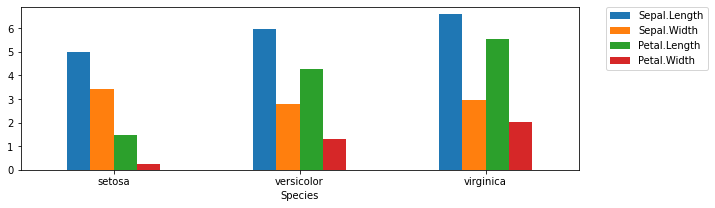

In [14]:
import matplotlib.pyplot as plt 
g.plot(kind='bar', rot=0, figsize=(10,3))
plt.legend(bbox_to_anchor=(1.05,1), loc=2 , borderaxespad=0)

In [15]:
iris_df.groupby(iris_df.Species).describe()

Sepal.Length                                                 \
                  count      mean       std  min    25%  50%  75%  max   
Species                                                                  
setosa             48.0  5.004167  0.358459  4.3  4.800  5.0  5.2  5.8   
versicolor         47.0  5.961702  0.512688  4.9  5.600  6.0  6.3  7.0   
virginica          50.0  6.588000  0.635880  4.9  6.225  6.5  6.9  7.9   

           Sepal.Width         ... Petal.Length      Petal.Width         \
                 count   mean  ...          75%  max       count   mean   
Species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
Species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [16]:
iris_df.groupby(iris_df.Species).describe().transpose()

Species                setosa  versicolor  virginica
Sepal.Length count  48.000000   47.000000  50.000000
             mean    5.004167    5.961702   6.588000
             std     0.358459    0.512688   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    6.000000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [17]:
# 그룹화 두개 이상이면 리스트안에 넣어줘야함
g = iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']]).mean()
g

Sepal.Length  Sepal.Width  Petal.Length
Species    Petal.Width                                         
setosa     0.1              4.820000     3.360000      1.380000
           0.2              4.966667     3.379310      1.444828
           0.3              4.971429     3.328571      1.428571
           0.4              5.300000     3.785714      1.571429
           0.5              5.100000     3.300000      1.700000
           0.6              5.000000     3.500000      1.600000
versicolor 1.0              5.483333     2.371429      3.628571
           1.1              5.400000     2.466667      3.566667
           1.2              5.780000     2.740000      4.240000
           1.3              5.900000     2.746154      4.176923
           1.4              6.357143     2.957143      4.500000
           1.5              6.222222     2.880000      4.580000
           1.6              6.100000     3.133333      4.766667
           1.7              6.700000     3.000000      5.000000
           1.8              5.900000     3.200000      4.800000
virginica  1.4              6.100000     2.600000      5.600000
           1.5              6.150000     2.500000      5.050000
           1.6              7.200000     3.000000      5.800000
           1.7              4.900000     2.500000      4.500000
           1.8              6.445455     2.918182      5.381818
           1.9              6.340000     2.680000      5.320000
           2.0              6.650000     3.016667      5.550000
           2.1              6.916667     3.033333      5.783333
           2.2              6.866667     3.200000      6.033333
           2.3              6.912500     3.087500      5.700000
           2.4              6.266667     3.100000      5.433333
           2.5              6.733333     3.400000      5.933333

In [18]:
g.unstack() # 끝에 있는 인덱스 Petal.Width가 컬럼값

Sepal.Length                                                    \
Petal.Width          0.1       0.2       0.3  0.4  0.5  0.6       1.0  1.1   
Species                                                                      
setosa              4.82  4.966667  4.971429  5.3  5.1  5.0       NaN  NaN   
versicolor           NaN       NaN       NaN  NaN  NaN  NaN  5.483333  5.4   
virginica            NaN       NaN       NaN  NaN  NaN  NaN       NaN  NaN   

                        ... Petal.Length                                       \
Petal.Width   1.2  1.3  ...          1.6  1.7       1.8   1.9   2.0       2.1   
Species                 ...                                                     
setosa        NaN  NaN  ...          NaN  NaN       NaN   NaN   NaN       NaN   
versicolor   5.78  5.9  ...     4.766667  5.0  4.800000   NaN   NaN       NaN   
virginica     NaN  NaN  ...     5.800000  4.5  5.381818  5.32  5.55  5.783333   

                                                
Petal.Width       2.2  2.3       2.4       2.5  
Species                                         
setosa            NaN  NaN       NaN       NaN  
versicolor        NaN  NaN       NaN       NaN  
virginica    6.033333  5.7  5.433333  5.933333  

[3 rows x 66 columns]

In [19]:
g.unstack().T

Species                     setosa  versicolor  virginica
             Petal.Width                                 
Sepal.Length 0.1          4.820000         NaN        NaN
             0.2          4.966667         NaN        NaN
             0.3          4.971429         NaN        NaN
             0.4          5.300000         NaN        NaN
             0.5          5.100000         NaN        NaN
...                            ...         ...        ...
Petal.Length 2.1               NaN         NaN   5.783333
             2.2               NaN         NaN   6.033333
             2.3               NaN         NaN   5.700000
             2.4               NaN         NaN   5.433333
             2.5               NaN         NaN   5.933333

[66 rows x 3 columns]

<AxesSubplot:>

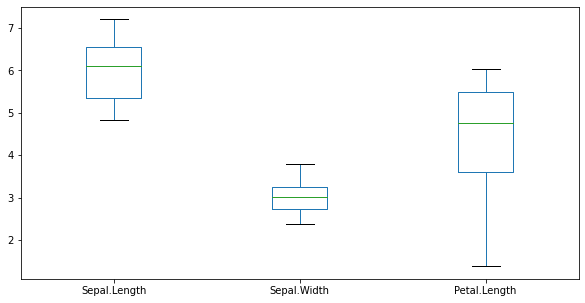

In [20]:
g.plot.box(figsize=(10,5))

In [21]:
# series 타입으로 출력
g = iris_df.groupby([iris_df['Species'],iris_df['Petal.Width']])['Sepal.Length'].mean()

In [22]:
g.unstack().T # unstack으로 dataframe화

Species,setosa,versicolor,virginica
Petal.Width,,,
0.1,4.820000,NaN,NaN
0.2,4.966667,NaN,NaN
0.3,4.971429,NaN,NaN
0.4,5.300000,NaN,NaN
0.5,5.100000,NaN,NaN
0.6,5.000000,NaN,NaN
1.0,NaN,5.483333,NaN
1.1,NaN,5.400000,NaN
1.2,NaN,5.780000,NaN


In [23]:
import pandas as pd
# 최대로 보여질 컬럼개수 
pd.options.display.max_columns

20

In [24]:
pd.options.display.max_columns = 22

## 8.2 그룹간 데이터

In [25]:
iris_group = iris_df.groupby(iris_df.Species)
iris_group

In [26]:
for idx, grouped in enumerate(iris_group):
    print(idx,'번째 그룹은 ')
    print(grouped)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

0 번째 그룹은 
('setosa',     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0            5.1          3.5           1.4          0.2  setosa
1            NaN          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14  

## 8.3 데이터 프레임 그룹 인덱싱

In [27]:
# 내용물이 튜플로 되어있기때문에 한번 더 분리 가능
for idx, (species_name,group) in enumerate(iris_group):
    print(idx,'번째 그룹은 ',species_name)
    print(group.sample(5).sort_index())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

0 번째 그룹은  setosa
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
16           5.4          3.9           1.3          0.4  setosa
23           5.1          3.3           1.7          0.5  setosa
25           5.0          3.0           1.6          0.2  setosa
43           5.0          3.5           1.6          0.6  setosa
47           4.6          3.2           1.4          0.2  setosa
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 번째 그룹은  versicolor
    Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
60           5.0          2.0           3.5          1.0  versicolor
64           5.6          2.9           3.6          1.3  versicolor
70           5.9          3.2           4.8          1.8  versicolor
73           6.1          2.8           4.7          1.2  versicolor
91           6.1          3.0           4.6          1.4  versicolor
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 번째 그룹은  virginica


In [28]:
# 간단히 하는 함수(take)
t = iris_df.groupby(iris_df.Species).take([0,1,2,3,4]) # 각 종별 0,12,3,4번째 가져오기
t

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species                                                             
setosa     0             5.1          3.5           1.4          0.2
           1             NaN          3.0           1.4          0.2
           2             4.7          3.2           1.3          0.2
           3             4.6          3.1           1.5          0.2
           4             5.0          3.6           1.4          0.2
versicolor 50            7.0          3.2           4.7          1.4
           51            6.4          3.2           4.5          1.5
           52            6.9          3.1           4.9          1.5
           53            5.5          2.3           4.0          1.3
           54            6.5          2.8           4.6          1.5
virginica  100           6.3          3.3           6.0          2.5
           101           5.8          2.7           5.1          1.9
           102           7.1          3.0           5.9          2.1
           103           6.3          2.9           5.6          1.8
           104           6.5          3.0           5.8          2.2

In [29]:
# loc사용가능
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,NaN,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 레이블(원핫인코딩)

In [30]:
# 컴퓨터 학습에 있어서 문자로 데이터를 입력할시 컴퓨터의 인식능력이 떨어진다. 
# 따라서 문자같은경우 숫자로 바꾼다.
# 위 작업을 지원해주는 함수가 있다.
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,NaN,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
iris_df.Species.describe()

count            150
unique             3
top       versicolor
freq              50
Name: Species, dtype: object

In [32]:
# 레이블을 지원하는 패키지 이용
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(iris_df['Species'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
iris_df['species'] = le.fit_transform(iris_df['Species'])
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,NaN,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


# 9. 데이터 구조 변경

## 9.1 와이드 포맷 vs. 롱 포맷

In [34]:
# 멜트 - 와이드 포멧을 롱 포멧으로 만드는 것 
# 와이드 포맷 : 열이 많은 데이터
# 롱 포맷 : 행이 많은 데이터
import statsmodels.api as sm
airquality_data = sm.datasets.get_rdataset("airquality",package='datasets').data
airquality = airquality_data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 9.2 melt를 이용한 언피벗팅

In [35]:
## pd.melt(airquality,id_var=['Month','Day']) 이 방식도 가능
airquality.melt(id_vars=['Month','Day']) # 멜트 결과값 반환 
## airqulity_melted = airquality.melt(id_vars=['Month','Day'],var_name='변수',value_name='값') 변수값 변환가능
airqulity_melted = airquality.melt(id_vars=['Month','Day'])
airqulity_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [36]:
#sort
airqulity_melted.sort_values(by=['Month','Day'])
airqulity_melted_sort = airqulity_melted.sort_values(by=['Month','Day'])

## 9.3 pivot_table을 이용한 피벗팅(롱형 ->와이드형)


In [37]:
# 멜트된 데이터 프레임 : airquality_melted , airqulity_melted_sort
airqulity_melted.pivot_table(index=['Month','Day'],columns=['variable'],values=['value'])
airquality2 = airqulity_melted.pivot_table(index=['Month','Day'],columns=['variable'],values=['value'])
airquality2

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [38]:
airquality2.loc[5] # 5월값만

value                    
variable  Ozone Solar.R  Temp  Wind
Day                                
1          41.0   190.0  67.0   7.4
2          36.0   118.0  72.0   8.0
3          12.0   149.0  74.0  12.6
4          18.0   313.0  62.0  11.5
5           NaN     NaN  56.0  14.3
6          28.0     NaN  66.0  14.9
7          23.0   299.0  65.0   8.6
8          19.0    99.0  59.0  13.8
9           8.0    19.0  61.0  20.1
10          NaN   194.0  69.0   8.6
11          7.0     NaN  74.0   6.9
12         16.0   256.0  69.0   9.7
13         11.0   290.0  66.0   9.2
14         14.0   274.0  68.0  10.9
15         18.0    65.0  58.0  13.2
16         14.0   334.0  64.0  11.5
17         34.0   307.0  66.0  12.0
18          6.0    78.0  57.0  18.4
19         30.0   322.0  68.0  11.5
20         11.0    44.0  62.0   9.7
21          1.0     8.0  59.0   9.7
22         11.0   320.0  73.0  16.6
23          4.0    25.0  61.0   9.7
24         32.0    92.0  61.0  12.0
25          NaN    66.0  57.0  16.6
26          NaN   266.0  58.0  14.9
27          NaN     NaN  57.0   8.0
28         23.0    13.0  67.0  12.0
29         45.0   252.0  81.0  14.9
30        115.0   223.0  79.0   5.7
31         37.0   279.0  76.0   7.4

In [39]:
# columns 수정
# month,day columns로 수정
airquality2 = airquality2.reset_index(level=['Month','Day'],col_level=1)
airquality2

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [40]:
# 변수, 값 columns level0 제거
airquality2.columns

MultiIndex([(     '',   'Month'),
            (     '',     'Day'),
            ('value',   'Ozone'),
            ('value', 'Solar.R'),
            ('value',    'Temp'),
            ('value',    'Wind')],
           names=[None, 'variable'])

In [41]:
airquality2.columns = airquality2.columns.droplevel(level=0)
airquality2

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [42]:
# airquality_melted_sort 데이터 프레임을 와이드형으로 피벗팅
airquality3 = airqulity_melted_sort.pivot_table(index=['Month','Day'],
                                                 columns=['variable'],
                                                 values=['value'])
airquality3

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [43]:
airquality3 = airquality3.reset_index(level=['Month','Day'],col_level=1)
airquality3

value                    
variable Month Day Ozone Solar.R  Temp  Wind
0            5   1  41.0   190.0  67.0   7.4
1            5   2  36.0   118.0  72.0   8.0
2            5   3  12.0   149.0  74.0  12.6
3            5   4  18.0   313.0  62.0  11.5
4            5   5   NaN     NaN  56.0  14.3
..         ...  ..   ...     ...   ...   ...
148          9  26  30.0   193.0  70.0   6.9
149          9  27   NaN   145.0  77.0  13.2
150          9  28  14.0   191.0  75.0  14.3
151          9  29  18.0   131.0  76.0   8.0
152          9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [44]:
airquality3.columns = airquality3.columns.droplevel(level=0)

In [45]:
airquality3

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [46]:
airqulity_melted = airquality.melt(id_vars=['Month','Day'],var_name='변수',value_name='값')

In [47]:
airqulity_melted = airqulity_melted.pivot_table(index=['Month','Day'],columns=['변수'],values=['값'])
airqulity_melted

값                    
변수        Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3
...         ...     ...   ...   ...
9     26   30.0   193.0  70.0   6.9
      27    NaN   145.0  77.0  13.2
      28   14.0   191.0  75.0  14.3
      29   18.0   131.0  76.0   8.0
      30   20.0   223.0  68.0  11.5

[153 rows x 4 columns]

In [48]:
airqulity_melted = airqulity_melted.reset_index(level=['Month','Day'],col_level=1)

In [49]:
airqulity_melted

값                    
변수  Month Day Ozone Solar.R  Temp  Wind
0       5   1  41.0   190.0  67.0   7.4
1       5   2  36.0   118.0  72.0   8.0
2       5   3  12.0   149.0  74.0  12.6
3       5   4  18.0   313.0  62.0  11.5
4       5   5   NaN     NaN  56.0  14.3
..    ...  ..   ...     ...   ...   ...
148     9  26  30.0   193.0  70.0   6.9
149     9  27   NaN   145.0  77.0  13.2
150     9  28  14.0   191.0  75.0  14.3
151     9  29  18.0   131.0  76.0   8.0
152     9  30  20.0   223.0  68.0  11.5

[153 rows x 6 columns]

In [50]:
airqulity_melted.columns = airqulity_melted.columns.droplevel(level=0)

In [51]:
airqulity_melted

변수,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [52]:
## 예제
# 주택도시보증공사_전국 평균 분양가격(2019년 12월).csv 을 df_last변수에
# 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv 을 df_first변수에 입력
# df_last랑 df_first랑 concat하기 위해 df_first를 df_last와 비슷한 구조로 변환
# 
#단, 시간별 평단분양가격의 추이, 지역별 평당분양가격의 추이를 분석 예정

In [53]:
#가져오기
df_last = pd.read_csv('data/(2015년 8월까지).csv',encoding='CP949')
df_first = pd.read_csv('data/(2019년 12월).csv',encoding='CP949')

In [54]:
df_last.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [55]:
df_first.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [56]:
df_last_melted = df_last.melt(id_vars='지역')
df_last_melted

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [57]:
df_last_melt_sort = df_last_melted.sort_values(by=['지역','variable'])

In [58]:
df_last_melt_sort

,지역,variable,value
9,강원,2013년12월,6230
179,강원,2014년10월,6631
196,강원,2014년11월,6365
213,강원,2014년12월,6365
26,강원,2014년1월,6230
...,...,...,...
282,충북,2015년4월,6790
299,충북,2015년5월,6805
316,충북,2015년6월,6682
333,충북,2015년7월,6601


In [59]:
temp=df_last_melt_sort['variable'].values
temp

array(['2013년12월', '2014년10월', '2014년11월', '2014년12월', '2014년1월',
       '2014년2월', '2014년3월', '2014년4월', '2014년5월', '2014년6월', '2014년7월',
       '2014년8월', '2014년9월', '2015년1월', '2015년2월', '2015년3월', '2015년4월',
       '2015년5월', '2015년6월', '2015년7월', '2015년8월', '2013년12월', '2014년10월',
       '2014년11월', '2014년12월', '2014년1월', '2014년2월', '2014년3월', '2014년4월',
       '2014년5월', '2014년6월', '2014년7월', '2014년8월', '2014년9월', '2015년1월',
       '2015년2월', '2015년3월', '2015년4월', '2015년5월', '2015년6월', '2015년7월',
       '2015년8월', '2013년12월', '2014년10월', '2014년11월', '2014년12월',
       '2014년1월', '2014년2월', '2014년3월', '2014년4월', '2014년5월', '2014년6월',
       '2014년7월', '2014년8월', '2014년9월', '2015년1월', '2015년2월', '2015년3월',
       '2015년4월', '2015년5월', '2015년6월', '2015년7월', '2015년8월', '2013년12월',
       '2014년10월', '2014년11월', '2014년12월', '2014년1월', '2014년2월',
       '2014년3월', '2014년4월', '2014년5월', '2014년6월', '2014년7월', '2014년8월',
       '2014년9월', '2015년1월', '2015년2월', '2015년3월', '2015년4월', '2015년

In [60]:
#연도
year = []
for data in temp:
   year.append(data[0:4])
year=(year)

In [61]:
year = np.array(year,dtype=np.int64)

In [62]:
year

array([2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2013,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2013, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2013, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015,
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2013, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015,
       2015, 2015, 2015, 2015, 2015, 2015, 2013, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2015, 2013, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2013, 2014, 2014, 20

In [63]:
df_last_melt_sort['연도'] = year

In [64]:
df_last_melt_sort

,지역,variable,value,연도
9,강원,2013년12월,6230,2013
179,강원,2014년10월,6631,2014
196,강원,2014년11월,6365,2014
213,강원,2014년12월,6365,2014
26,강원,2014년1월,6230,2014
...,...,...,...,...
282,충북,2015년4월,6790,2015
299,충북,2015년5월,6805,2015
316,충북,2015년6월,6682,2015
333,충북,2015년7월,6601,2015


In [65]:
#월
month = []
for data in temp:
    month.append(data.split('월')[0].split('년')[1])
month

['12',
 '10',
 '11',
 '12',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '12',
 '10',
 '11',
 '12',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '12',
 '10',
 '11',
 '12',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '12',
 '10',
 '11',
 '12',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '12',
 '10',
 '11',
 '12',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '12',
 '10',
 '11',
 '12',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '12',
 '10',
 '11',
 '12',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '12',
 '10',
 '11',
 '12',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '1',
 '

In [66]:
month = np.array(month,dtype=np.int64)

In [67]:
df_last_melt_sort['월'] = month

In [68]:
df_last_melt_sort

,지역,variable,value,연도,월
9,강원,2013년12월,6230,2013,12
179,강원,2014년10월,6631,2014,10
196,강원,2014년11월,6365,2014,11
213,강원,2014년12월,6365,2014,12
26,강원,2014년1월,6230,2014,1
...,...,...,...,...,...
282,충북,2015년4월,6790,2015,4
299,충북,2015년5월,6805,2015,5
316,충북,2015년6월,6682,2015,6
333,충북,2015년7월,6601,2015,7


In [69]:
df_first

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN


In [70]:
df_last_melt_sort.head(10)

,지역,variable,value,연도,월
9,강원,2013년12월,6230,2013,12
179,강원,2014년10월,6631,2014,10
196,강원,2014년11월,6365,2014,11
213,강원,2014년12월,6365,2014,12
26,강원,2014년1월,6230,2014,1
43,강원,2014년2월,6230,2014,2
60,강원,2014년3월,6141,2014,3
77,강원,2014년4월,6373,2014,4
94,강원,2014년5월,6350,2014,5
111,강원,2014년6월,6350,2014,6


In [71]:
df_last_melt_sort = df_last_melt_sort[['지역','variable','연도','월','value']]

In [72]:
df_last_melt_sort.columns = ['지역명','규모구분','연도','월','분양가격(㎡)']

In [73]:
df_last_melt_sort['규모구분'] = '전체'

In [74]:
df_last_melt_sort['분양가격(㎡)'] = df_last_melt_sort['분양가격(㎡)']/3

In [75]:
df_first

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN


In [76]:
df_last_melt_sort

,지역명,규모구분,연도,월,분양가격(㎡)
9,강원,전체,2013,12,2076.666667
179,강원,전체,2014,10,2210.333333
196,강원,전체,2014,11,2121.666667
213,강원,전체,2014,12,2121.666667
26,강원,전체,2014,1,2076.666667
...,...,...,...,...,...
282,충북,전체,2015,4,2263.333333
299,충북,전체,2015,5,2268.333333
316,충북,전체,2015,6,2227.333333
333,충북,전체,2015,7,2200.333333


In [77]:
total_df = pd.concat([df_first,df_last_melt_sort])

In [78]:
total_df

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
282,충북,전체,2015,4,2263.33
299,충북,전체,2015,5,2268.33
316,충북,전체,2015,6,2227.33
333,충북,전체,2015,7,2200.33


In [79]:
total_df_sort =  total_df.sort_values(by=['지역명','연도','월'])

In [80]:
total_df_final=total_df_sort.reset_index(col_level=0)

In [81]:
total_df_final

,index,지역명,규모구분,연도,월,분양가격(㎡)
0,9,강원,전체,2013,12,2076.67
1,26,강원,전체,2014,1,2076.67
2,43,강원,전체,2014,2,2076.67
3,60,강원,전체,2014,3,2047
4,77,강원,전체,2014,4,2124.33
...,...,...,...,...,...,...
4687,4300,충북,전체,2019,12,2305
4688,4301,충북,전용면적 60㎡이하,2019,12,2324
4689,4302,충북,전용면적 60㎡초과 85㎡이하,2019,12,2297
4690,4303,충북,전용면적 85㎡초과 102㎡이하,2019,12,2634


In [82]:
total_df_final = total_df_final.drop('index',axis=1)

In [83]:
total_df_final

,지역명,규모구분,연도,월,분양가격(㎡)
0,강원,전체,2013,12,2076.67
1,강원,전체,2014,1,2076.67
2,강원,전체,2014,2,2076.67
3,강원,전체,2014,3,2047
4,강원,전체,2014,4,2124.33
...,...,...,...,...,...
4687,충북,전체,2019,12,2305
4688,충북,전용면적 60㎡이하,2019,12,2324
4689,충북,전용면적 60㎡초과 85㎡이하,2019,12,2297
4690,충북,전용면적 85㎡초과 102㎡이하,2019,12,2634


In [85]:
total_df_final[1:30]

,지역명,규모구분,연도,월,분양가격(㎡)
1,강원,전체,2014,1,2076.67
2,강원,전체,2014,2,2076.67
3,강원,전체,2014,3,2047
4,강원,전체,2014,4,2124.33
5,강원,전체,2014,5,2116.67
6,강원,전체,2014,6,2116.67
7,강원,전체,2014,7,2089.33
8,강원,전체,2014,8,2089.33
9,강원,전체,2014,9,2139.67
10,강원,전체,2014,10,2210.33


In [86]:
# 데이터프레임의 구조를 바꾸는 함수들 : melt,pivot_table(연산),pivot(연산x)

In [89]:
year = [2020,2020,2020,2021,2021,2021]
mon = [1,2,3]*2
latte = [410,401,402,400,404,405]
americano = [500,483,484,470,486,488]
mocha = [350,299,300,301,302,300]
sales = pd.DataFrame({'year':year,'mon':mon,'latte':latte,'americano':americano,'mocha':mocha})
## sales = pd.DataFrame(np.c_[year,,mon,latte,americano,mocha],columns=['year','mon','latte','americano','mocha'])
sales

,year,mon,latte,americano,mocha
0,2020,1,410,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,400,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [90]:
sales_melted = sales.melt(id_vars=['year','mon'])
sales_melted

,year,mon,variable,value
0,2020,1,latte,410
1,2020,2,latte,401
2,2020,3,latte,402
3,2021,1,latte,400
4,2021,2,latte,404
5,2021,3,latte,405
6,2020,1,americano,500
7,2020,2,americano,483
8,2020,3,americano,484
9,2021,1,americano,470


In [92]:
sale2 = sales_melted.pivot_table(index=['year','mon'],columns='variable',values='value')
sale2

variable  americano  latte  mocha
year mon                         
2020 1          500    410    350
     2          483    401    299
     3          484    402    300
2021 1          470    400    301
     2          486    404    302
     3          488    405    300

In [93]:
latte_sales = sales.loc[:,'year':'latte']
latte_sales

,year,mon,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


In [94]:
latte_sales.pivot('year','mon') # year는 index,mon은 columns

latte          
mon      1    2    3
year                
2020   410  401  402
2021   400  404  405

# 10. 데이터프레임에 함수적용시키기

## 10.1 apply
- 데이터프레임이나 시리즈에 각 열 또는 각 행에 함수 적용

In [95]:
import statsmodels as sm
iris_df = sm.datasets.get_rdataset('iris',package='datasets').data
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [97]:
# 독립변수 
# iris_df.loc[:,'Sepal.Length':'Petal.Width']
X = iris_df.iloc[:,:-1]

In [98]:
# 값 하나 하나당 round
X.apply(np.round)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [99]:
# sum은 값 하나,하나당 하는게 아니라 할당필요
X.apply(np.sum,axis=0) # 열별 sum

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [100]:
X.apply(np.sum,axis=1) # 행별 sum

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [105]:
# 각 데이터와 평균과의 거리를 출력
avg = X.apply(np.average) # 각 열의 평균
X.apply(lambda x : x-avg, axis=1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [106]:
# 각 데이터와 평균과의 거리를 출력 : 리스트 형태로 출력
X.apply(lambda x : list(x-avg), axis=1)

0      [-0.7433333333333341, 0.4426666666666663, -2.3...
1      [-0.9433333333333334, -0.05733333333333368, -2...
2      [-1.1433333333333335, 0.1426666666666665, -2.4...
3      [-1.243333333333334, 0.04266666666666641, -2.2...
4      [-0.8433333333333337, 0.5426666666666664, -2.3...
                             ...                        
145    [0.8566666666666665, -0.05733333333333368, 1.4...
146    [0.4566666666666661, -0.5573333333333337, 1.24...
147    [0.6566666666666663, -0.05733333333333368, 1.4...
148    [0.35666666666666647, 0.34266666666666623, 1.6...
149    [0.05666666666666664, -0.05733333333333368, 1....
Length: 150, dtype: object

In [107]:
# 각 데이터와 평균과의 거리를 출력 : 리스트 형태로 출력
# result_type = 'broadcast' : 출력타입을 원본데이터(x) 그대로
X.apply(lambda x : list(x-avg), axis=1, result_type = 'broadcast')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [115]:
df_first = pd.read_csv('data/(2015년 8월까지).csv',encoding='CP949')
new_first = df_first.melt(id_vars="지역", 
                          var_name="연도월", 
                          value_name="평당분양가격")

In [116]:
new_first

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [117]:
date = "2021년3월"
date.split('년')

['2021', '3월']

In [118]:
def parse_year(x):
    return(x.split('년')[0])
parse_year(date)

'2021'

In [119]:
def parse_mon(x):
    return(x.split('년')[-1].replace('월',''))
parse_mon(date)

'3'

In [125]:
new_first['연도']=new_first['연도월'].apply(lambda x : int(x.split('년')[0]))

In [126]:
new_first['월']=new_first['연도월'].apply(lambda x : int(x.split('년')[-1].replace('월',''))) 

In [127]:
new_first

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [128]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.1+ KB


## 10.2 applymap
- apply : 행 또는 열단위로 함수적용
- applymap : 각 요소 하나하나 별로 적용

In [129]:
X.apply(np.sum,axis=0)

Sepal.Length    876.5
Sepal.Width     458.6
Petal.Length    563.7
Petal.Width     179.9
dtype: float64

In [130]:
X.applymap(np.sum) # 요소요소별로 작동함으로 합계로 하는건 의미가없다

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [131]:
X.applymap(lambda x : x**2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 10.3 map 
- 각 요소요소별로 적용, series 타입의 벡터만 가능

In [132]:
new_first['연도'] = new_first['연도월'].map(lambda x : int(x.split('년')[0]))

In [133]:
new_first.head(2)

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12


In [135]:
x = pd.Series(['홍길동',20,'서울 마포'],index=['Name','Age','Address'])
x

Name         홍길동
Age           20
Address    서울 마포
dtype: object

In [ ]:
def my_func(data):
    return data,

In [137]:
x.map(lambda data : (data, len(str(data))))

Name         (홍길동, 3)
Age           (20, 2)
Address    (서울 마포, 5)
dtype: object

In [140]:
# 딕셔너리를 map에 적용하면 딕셔너리의 키별로 시리즈 값이 적용
dic ={"홍길동":"김길동",20:25,"서울 마포":"서울 서대문"}
x.map(dic)

Name          김길동
Age            25
Address    서울 서대문
dtype: object

In [141]:
s = pd.Series([1,2,3,4,None])

In [143]:
s.map(lambda x : (x, x**2))

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4     (nan, nan)
dtype: object

In [144]:
# 연산적용이 안되는 부분을 적용시키지 않도록
s.map(lambda x : (x,x**2),na_action='ignore')

0     (1.0, 1.0)
1     (2.0, 4.0)
2     (3.0, 9.0)
3    (4.0, 16.0)
4            NaN
dtype: object

# 11. 일괄 변경하기(결측치나 특정값)

## 11.1 fillna(결측치를 어떤 측정값으로 바꿔라)

In [145]:
df = pd.DataFrame([[np.nan,2,np.nan,0],
                  [3,4,np.nan,1],
                  [np.nan,3,np.nan,5],
                  [np.nan,3,np.nan,4]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [146]:
# 모든 결측치를 0으로 채움
df.fillna(0) # 결측치가 0으로 대치된 값을 반환 

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [147]:
# 결측치가 아닌 이전값 또는 다음값으로 채움
    # pad/ffill : 결측치가 아닌 이전값으로 채움
    # backfill/ bfill : 결측치가 아닌 다음값으로 채움
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [148]:
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [151]:
values={"A":99,"B":98,"C":97,"D":95} # 열별 결측치 대체값
df.fillna(value=values)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,97.0,4


In [152]:
df.mean()

A    3.0
B    3.0
C    NaN
D    2.5
dtype: float64

In [153]:
df.fillna(value=df.mean()) # 모두 결측치가 있는 C컬럼은 대체가 안됨

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [160]:
mean = df.mean()
from math import isnan
for key,value in mean.items():
    if isnan(value):
        mean[key] = 0
mean

A    3.0
B    3.0
C    0.0
D    2.5
dtype: float64

In [161]:
df.fillna(value=mean)

,A,B,C,D
0,3.0,2,0.0,0
1,3.0,4,0.0,1
2,3.0,3,0.0,5
3,3.0,3,0.0,4


In [162]:
# 2번째 결측치까지만 대체
df.fillna(value=values,limit=2)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,NaN,5
3,NaN,3,NaN,4


## 11.2 replace(to_value,new_value,inplace=False)
- to_value를 new_value로 변경
- inplace = False : 변경된 내용을 반환. 데이터프레임 적용되지 않음
- inplace = True : 변경된 내용이 데이터 프레임에 적용되고 반환값은 없음

In [163]:
s = pd.Series([0,1,2,3,4,None])
s.replace(0,5,inplace=True)

In [166]:
s.replace(np.nan,3)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
5    3.0
dtype: float64

In [167]:
df = pd.DataFrame({'A':[0,1,2,3,4],
                 'B':[5,6,7,8,9],
                 'C':['a','b','c','d','e']})
df

,A,B,C
0,0,5,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [168]:
# 인자를 list로 쓸 수 도 잇다. 
df.replace([0,1,2,3],[99,98,97,96])

,A,B,C
0,99,5,a
1,98,6,b
2,97,7,c
3,96,8,d
4,4,9,e


In [170]:
df.replace(range(4),range(4,0,-1)) #[0,1,2,3]을 [4,3,2,1]로 대체

,A,B,C
0,4,5,a
1,3,6,b
2,2,7,c
3,1,8,d
4,4,9,e


In [171]:
# 딕셔너리도 사용가능
df.replace({'A':0,'B':5},99) # A열의 0과 B열의 5를 99로 대체 

,A,B,C
0,99,99,a
1,1,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [173]:
df = pd.DataFrame({'A':['bat','foo','bait'],
                  'B':['abc','bar','xyz'],
                  })
df

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [174]:
# to_value에 정규표현식이 사용된 경우(ba로 시작하고 마지막 하나의 임의의 문자가 있는 문자열)
df.replace(to_replace=r'^ba.$',value='newBar',regex=True)

,A,B
0,newBar,abc
1,foo,newBar
2,bait,xyz


In [175]:
df.replace({'A':r'^ba.$'},{'A':'newBar'},regex=True)

,A,B
0,newBar,abc
1,foo,bar
2,bait,xyz


## 11.3 where, mask
- where : 조건이 만족하는 요소는 그대로 출력. (반) mask

In [176]:
s = pd.Series(range(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [177]:
s.where(s>0) # 조건이 만족하면  값만 보이고 만족하지 않으면 결측치로 대체

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [178]:
s.where(s>0,99)  # 조건이 만족하면  값만 보이고 만족하지 않으면 99로 대체

0    99
1     1
2     2
3     3
4     4
dtype: int64

In [179]:
s.mask(s>0)

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [180]:
s.mask(s>0,99)

0     0
1    99
2    99
3    99
4    99
dtype: int64

## 11.4 dropna
- 결측치 있는 데이터를 누락시킴

In [184]:
df = pd.DataFrame({'name':['박','김','최',np.nan],
                   'age':[np.nan,20,60,np.nan],
                   'born':[np.nan,'서울',np.nan,np.nan]})
df

,name,age,born
0,박,NaN,NaN
1,김,20.0,서울
2,최,60.0,NaN
3,NaN,NaN,NaN


In [185]:
df.dropna() #결측치가 있는 행 제거해서 반환

,name,age,born
1,김,20.0,서울


In [190]:
df =df.dropna(how='all') # 행의 모든 열의 데이터가 다 결측치인 행만 제거해서 반환
df

,name,age,born
0,박,NaN,NaN
1,김,20.0,서울
2,최,60.0,NaN


In [189]:
df.dropna(axis=1) # 결측치가 있는 열들 제거

,name
0,박
1,김
2,최


In [191]:
# 결측치가 2개 인상인 행만 제거
df.dropna(thresh=2)

,name,age,born
1,김,20.0,서울
2,최,60.0,NaN


## 11.5 astype
- pandas의 dtype 속성을 변경

In [194]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.1+ KB


In [195]:
# 월 columns를 int64 에서 문자타입으로 변경
new_first['월'] = new_first['월'].astype('str')

In [196]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    object
dtypes: int64(2), object(3)
memory usage: 14.1+ KB


In [197]:
# 원본값에도 영향을 줄 수 있는 상황에서는 copy를 써주어야한다.
new_first['평당가격'] = new_first['평당분양가격'].astype('float64',copy=True)

In [198]:
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      357 non-null    object 
 1   연도월     357 non-null    object 
 2   평당분양가격  357 non-null    int64  
 3   연도      357 non-null    int64  
 4   월       357 non-null    object 
 5   평당가격    357 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 16.9+ KB


# 12. 시리즈

In [201]:
s = pd.Series([1000,2000,2500,3000,4000],
             index=['apple','banana','mango','cherry','orange'])
s

apple     1000
banana    2000
mango     2500
cherry    3000
orange    4000
dtype: int64

In [202]:
s['mango']

2500

In [203]:
# 요소 조회
s['mango':'orange']

mango     2500
cherry    3000
orange    4000
dtype: int64

In [204]:
# 요소 삭제
s.drop('mango') # 삭제된 값을 반환. 적용을 원하면 inplace=True나 할당

apple     1000
banana    2000
cherry    3000
orange    4000
dtype: int64

In [208]:
# 요소 나열 
s.sort_values(ascending=False) # ascending = False 는 내림차순 . 기본값 True

orange    4000
cherry    3000
mango     2500
banana    2000
apple     1000
dtype: int64

In [209]:
# dataframe으로 변형
s.to_frame()

,0
apple,1000
banana,2000
mango,2500
cherry,3000
orange,4000


In [94]:
##예제 
import random
import statsmodels.api as sm
#아이리스 가져오기
iris_df = sm.datasets.get_rdataset('iris').data
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [101]:
#1단계
t=random.sample(range(len(iris_df)),20)

In [96]:
for idx in t :
    iris_df.loc[idx,'Sepal.Length'] = np.nan

In [98]:
for idx in t :
    iris_df.loc[idx,'Sepal.Width'] = np.nan

In [100]:
for idx in t :
    iris_df.loc[idx,'Petal.Length'] = np.nan

In [102]:
for idx in t :
    iris_df.loc[idx,'Petal.Width'] = np.nan

In [155]:
##iris_df.info()

import numpy as np
import random
iris_df.iloc[random.sample(range(len(iris_df)),20),0]

143    NaN
68     6.2
46     5.1
51     6.4
54     6.5
123    NaN
106    NaN
78     6.0
136    6.3
103    NaN
135    7.7
76     NaN
59     5.2
13     4.3
84     NaN
0      NaN
10     5.4
98     5.1
50     7.0
48     5.3
Name: Sepal.Length, dtype: float64

In [ ]:
## 각 열에 랜덤한 인덱스를 선정해 NaN값을 넣는 for문
## for col in range(iris_df.shape[1]-1):
##    iris_df.iloc[random.sample(range(len(iris_df)),20),col] = np.nan


In [154]:
# 2단계
iris_df[iris_df.isnull().any(axis=1)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,NaN,3.5,NaN,0.2,setosa
4,5.0,NaN,1.4,0.2,setosa
5,5.4,NaN,1.7,0.4,setosa
6,NaN,3.4,1.4,0.3,setosa
7,NaN,3.4,NaN,0.2,setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,NaN,virginica
143,NaN,NaN,5.9,2.3,virginica
144,6.7,3.3,NaN,2.5,virginica
145,6.7,3.0,5.2,NaN,virginica


In [162]:
# 3단계
iris_df = iris_df.fillna(iris_df.mean())
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.838462,3.500000,3.72,0.200000,setosa
1,4.900000,3.000000,1.40,0.200000,setosa
2,4.700000,3.200000,1.30,0.200000,setosa
3,4.600000,3.100000,1.50,0.200000,setosa
4,5.000000,3.049231,1.40,0.200000,setosa
...,...,...,...,...,...
145,6.700000,3.000000,5.20,1.149231,virginica
146,6.300000,2.500000,5.00,1.900000,virginica
147,6.500000,3.000000,5.20,2.000000,virginica
148,6.200000,3.400000,5.40,2.300000,virginica


In [161]:
iris_df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [163]:
iris_df.mean()

Sepal.Length    5.838462
Sepal.Width     3.049231
Petal.Length    3.720000
Petal.Width     1.149231
dtype: float64

In [164]:
## 연습문제 실습
import seaborn as sns
iris = sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [189]:
#1
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [186]:
#2
# 독립변수
X = iris.iloc[:,0:4]
# 종속변수
Y = iris.iloc[:,-1]

In [188]:
#3 
temp = iris[0:50]

In [473]:
#4
temp.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [193]:
#5
iris_versicolor = iris.loc[iris.species=='versicolor']

In [203]:
#6
iris_df = pd.concat([X,Y],axis=1)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [204]:
#7
iris.mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [205]:
#8
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [318]:
#9
avg = X.mean()
X.apply(lambda x : x-avg, axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [474]:
#10
gs = iris.groupby(iris.species).mean()

In [328]:
iris_se=iris.loc[iris.species=='setosa'] 
iris_ver=iris.loc[iris.species=='versicolor']
iris_vir=iris.loc[iris.species=='virginica']

In [316]:
#11 
for idx in range(len(iris.species.unique())):
    print(iris.loc[iris.species==iris.species.unique()[idx]][0:3] - gs.iloc[idx])

   petal_length  petal_width  sepal_length  sepal_width species
0        -0.062       -0.046         0.094        0.072     NaN
1        -0.062       -0.046        -0.106       -0.428     NaN
2        -0.162       -0.046        -0.306       -0.228     NaN
    petal_length  petal_width  sepal_length  sepal_width species
50          0.44        0.074         1.064         0.43     NaN
51          0.24        0.174         0.464         0.43     NaN
52          0.64        0.174         0.964         0.33     NaN
     petal_length  petal_width  sepal_length  sepal_width species
100         0.448        0.474        -0.288        0.326     NaN
101        -0.452       -0.126        -0.788       -0.274     NaN
102         0.348        0.074         0.512        0.026     NaN


In [479]:
####### 정답
gs = iris.groupby(iris.species).mean()
print(gs.index)
print(gs.columns)
print(gs.loc['setosa',:])

Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='species')
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
Name: setosa, dtype: float64


In [485]:
result = iris.apply(lambda x : x[:-1]-gs.loc[x.species,:],axis=1)
result

,sepal_length,sepal_width,petal_length,petal_width
0,0.094,0.072,-0.062,-0.046
1,-0.106,-0.428,-0.062,-0.046
2,-0.306,-0.228,-0.162,-0.046
3,-0.406,-0.328,0.038,-0.046
4,-0.006,0.172,-0.062,-0.046
...,...,...,...,...
145,0.112,0.026,-0.352,0.274
146,-0.288,-0.474,-0.552,-0.126
147,-0.088,0.026,-0.352,-0.026
148,-0.388,0.426,-0.152,0.274


In [486]:
result.loc[[0,1,2,50,51,52,100,101,102]]

,sepal_length,sepal_width,petal_length,petal_width
0,0.094,0.072,-0.062,-0.046
1,-0.106,-0.428,-0.062,-0.046
2,-0.306,-0.228,-0.162,-0.046
50,1.064,0.430,0.440,0.074
51,0.464,0.430,0.240,0.174
52,0.964,0.330,0.640,0.174
100,-0.288,0.326,0.448,0.474
101,-0.788,-0.274,-0.452,-0.126
102,0.512,0.026,0.348,0.074
